In [4]:
import pandas as pd
import numpy as np
import gc
import os

In [5]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data_x=train_data.drop("label",1)

In [8]:
labels=train_data["label"]

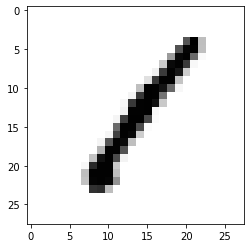

In [9]:
import matplotlib.pyplot as plt
grid_data=train_data_x.iloc[0,:]
grid_data=grid_data.values.reshape(28,28)
plt.imshow(grid_data,cmap='Greys')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test =train_test_split(train_data_x,labels,train_size=0.9,random_state=100)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37800, 784)
(4200, 784)
(37800,)
(4200,)


In [13]:
shaped_x_train=X_train.values.reshape(37800,28,28,1)/255
shaped_x_test=X_test.values.reshape(4200,28,28,1)/255

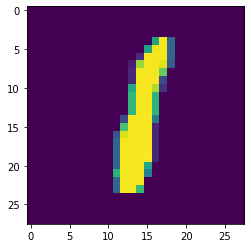

In [14]:
plt.imshow(shaped_x_train[0].reshape(28,28))

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
con_y_train=to_categorical(y_train.values,num_classes=10)
con_y_test=to_categorical(y_test.values,num_classes=10)

In [17]:
y_train.values[0]

1

In [18]:
con_y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Building Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Dense,Conv2D,Flatten,Dropout

In [20]:
model1=Sequential()

model1.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2),strides=2))
model1.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2),strides=2))
model1.add(Conv2D(filters=128,kernel_size=(4,4),strides=(1,1),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2),strides=2))
model1.add(Dropout(0.3))

model1.add(Flatten())

model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(10,activation='softmax'))

model1.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 128)         0

In [22]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="my_digit.hdf5",
                                   monitor='val_loss', 
                                   save_best_only=True,
                                   verbose=1)

In [24]:
estop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [25]:
model1.fit(x=shaped_x_train,y=con_y_train,epochs=15,callbacks=[estop,checkpointer],validation_data=(shaped_x_test,con_y_test))

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
37792/37800 [============================>.] - ETA: 0s - loss: 0.1894 - accuracy: 0.9402
Epoch 00001: val_loss improved from inf to 0.06267, saving model to my_digit.hdf5
37800/37800 [==============================] - 39s 1ms/sample - loss: 0.1893 - accuracy: 0.9402 - val_loss: 0.0627 - val_accuracy: 0.9788
Epoch 2/15
37792/37800 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9839 ETA: 0s - loss: 0.0543 - accuracy: 
Epoch 00002: val_loss improved from 0.06267 to 0.03936, saving model to my_digit.hdf5
37800/37800 [==============================] - 35s 918us/sample - loss: 0.0542 - accuracy: 0.9839 - val_loss: 0.0394 - val_accuracy: 0.9869
Epoch 3/15
37792/37800 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9871
Epoch 00003: val_loss improved from 0.03936 to 0.02966, saving model to my_digit.hdf5
37800/37800 [==============================] - 37s 968us/sample - loss: 0.0424 - ac

In [26]:
sig_pic=test_data.values[0].reshape(1,28,28,1)/255

In [27]:
model1_history=pd.DataFrame(model1.history.history)

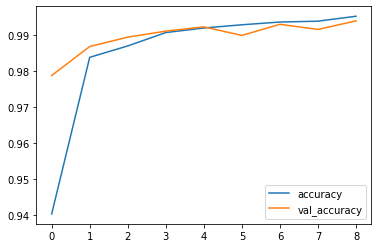

In [28]:
model1_history[['accuracy','val_accuracy']].plot()

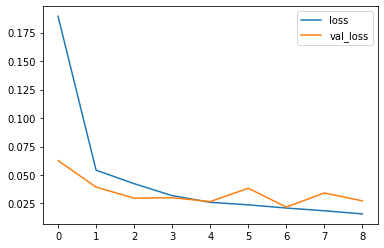

In [29]:
model1_history[['loss','val_loss']].plot()

In [30]:
pred=model1.predict_classes(shaped_x_test)

## Evaluating model

In [31]:
from sklearn import metrics

In [32]:
metrics.accuracy_score(y_test,pred)

0.9940476190476191

In [33]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      1.00      1.00       438
           2       0.99      1.00      0.99       424
           3       0.99      1.00      0.99       407
           4       0.98      0.99      0.99       384
           5       1.00      0.99      0.99       400
           6       0.99      1.00      1.00       403
           7       1.00      1.00      1.00       431
           8       1.00      0.98      0.99       431
           9       0.99      0.99      0.99       456

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [34]:
model1.predict_classes(sig_pic)

array([2], dtype=int64)

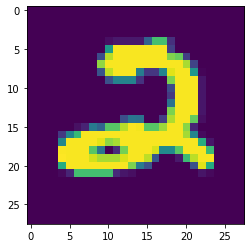

In [35]:
plt.imshow(test_data.values[0].reshape(28,28))

## Prediction 

In [58]:
final_test=test_data.values.reshape(28000,28,28,1)/255

In [59]:
final_prediction=model1.predict_classes(final_test)

In [60]:
final_prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [61]:
final_df=pd.DataFrame({'ImageId':range(1,28001),'Label':final_prediction})

In [62]:
final_df=final_df.set_index('ImageId')

In [63]:
final_df.to_csv('test_label_CNN')

In [64]:
final_df

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3
